# Breast Cancer Wisconsin (Diagnostic)

## 前提知識の説明

### SVMとは

SVMとは分類と回帰の両方に利用可能な教師あり学習のモデルです。  
2次元の特徴量を持つデータに対し、線形モデルによって2クラス分類を行うことを考えます。  
学習データのプロットされた平面上に直線を引いて領域を2つに分ける作業で、分類とは線を引くことであり、SVMはうまい具合に線を引く方法です。  
SVMではどの点にも被らないようにできるだけ広い帯を引こうとします。
- メリット  
他のモデルと比較して高い識別性能が得られる  
- デメリット  
データの前処理やパラメーターの調整、結果の解釈が難しい  
- 特徴
「マージン」という「距離のような概念」の最大化を目的としている。  
平均や分散を使わないので新しいデータが入ってきても全体の再計算は不要。  
線形分離が不可能な場合は、「非線形変換を施したうえでより高次元特徴空間に写像」することで対応できる。

### SVMにおけるカーネルとは

線形分離ができない場合、データをある関数により、より高次元空間に埋め込むことで、SVMを使って線形分離にすることができる。このときに使う関数をカーネルといいます。  
SVMには以下のカーネルが用意されています。  
- linear（線形カーネル）
- poly（多項式カーネル）
- rbf（RBFカーネル）
- sigmoid（シグモイドカーネル）
- precomputed（事前に計算したものを利用する）

### 線形回帰やロジスティック回帰との比較

線形回帰やロジスティック回帰は、目的関数を最小化するために各パラメータで偏微分した式を最急降下法の式に導入しました。  
一方、SVMでは最急降下法は使うが、目的関数の最小値を求める際にベクトルの内積を使います。

In [1]:
# 各種ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## データ・セットの用意
UCIのBreast Cancer Wisconsin (Diagnostic) Data Setを使用  
[breast-cancer-wisconsin.data](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

# EDA

## Introduction

このデータ分析レポートでは、Breast Cancer Wisconsin (Diagnostic)のデータセットを使用して、SVMアルゴリズムによるモデルを構築し、乳がんかそうではないかを分類するために、データ探索を視覚的に行ないます。

 #### 各特徴量はUCIのBreast Cancer Wisconsin (Diagnostic) Data Setの公式HP内の記載内容を参照します。
>http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29  
1）ID番号  
2）診断（M =悪性、B =良性）  
3-32）  
10個の実数値の特徴量が各セルの核について計算されます。  
a）半径（中心から周囲の点までの距離の平均）  
b）テクスチャ（グレースケール値の標準偏差）  
c）周囲  
d）面積  
e）滑らかさ（半径の長さの局所的変化）  
f）コンパクト性（周囲^ 2 /面積-1.0）  
g）凹み（輪郭の凹部の程度）  
h）凹点（輪郭の凹部の数）  
i）対称性  
j）フラクタル次元（「海岸線近似」-1）  

In [2]:
# データセットの読み込み
df= pd.read_csv("input/bcwd.txt",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


カラム名を下記のURLを参照して数字の代わりに文字列を埋めていきます。    >https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data

In [3]:
df=df.rename(columns={0:'id',1: 'diagnosis',2: 'radius_mean', 3:'texture_mean', 4:'perimeter_mean',
       5:'area_mean', 6:'smoothness_mean',7: 'compactness_mean',8: 'concavity_mean',
       9:'concave points_mean',10: 'symmetry_mean', 11:'fractal_dimension_mean',
       12:'radius_se', 13:'texture_se',14: 'perimeter_se',15: 'area_se',16: 'smoothness_se',
      17: 'compactness_se',18: 'concavity_se',19: 'concave points_se',20: 'symmetry_se',
       21:'fractal_dimension_se',22: 'radius_worst',23: 'texture_worst',
       24:'perimeter_worst', 25:'area_worst',26: 'smoothness_worst',
       27:'compactness_worst',28: 'concavity_worst',29: 'concave points_worst',
      30: 'symmetry_worst',31: 'fractal_dimension_worst',})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2列目はラベルになります。

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

カラム数は32（ID、診断、特徴量数：30）  
IDが整数値、診断はカテゴリカルデータ、特徴量は小数値  
データ数は569  
欠損値なし  

idは診断結果と関係がないため削除します。

In [6]:
df.drop('id',axis=1,inplace=True)

良性の人数:  357
悪性の人数:  212


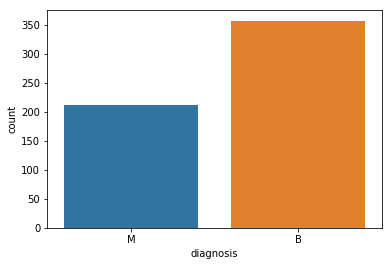

In [7]:
df_y=df.diagnosis 
ax=sns.countplot(df_y,label='Count')
B,M =df_y.value_counts()
print('良性の人数: ',B)
print('悪性の人数: ',M)

診断（M =悪性、B =良性）
良性357例、悪性212例

次に腫瘍の半径が診断結果（MとB）にどのように関係しているのかヒストグラムでプロットして確認します。平均値と最悪（最大値）値をそれぞれ表示しています。
半径の数値が小さい方にBの人数が固まっていて、反対に半径大きくなるほどMの人数が増えていき、ある値からはMのみになります。半径は診断結果への影響が大きいと考えられます。  
また平均値より最悪（最大値）値の方が顕著に傾向が表れています。

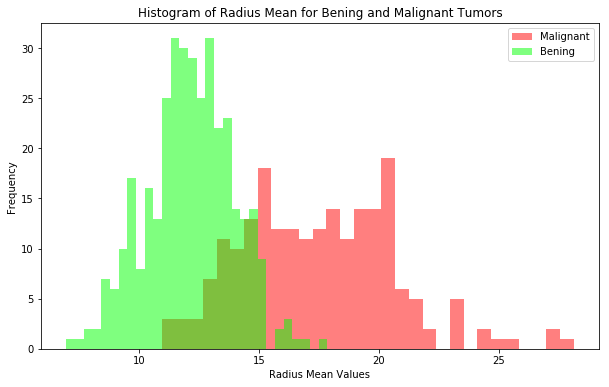

Most frequent malignant radius mean is:  20.101999999999997


In [8]:
f,ax = plt.subplots(figsize=(10,6))
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

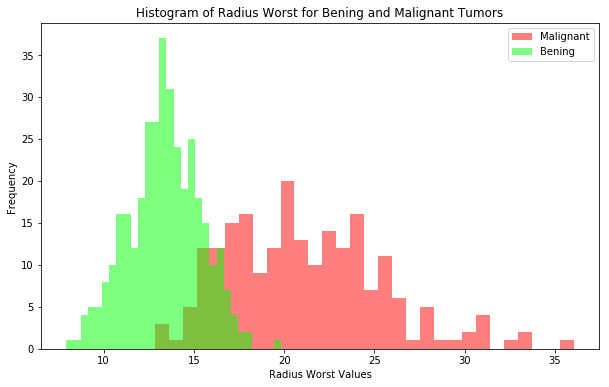

Most frequent malignant radius worst is:  19.8


In [9]:
f,ax = plt.subplots(figsize=(10,6))
m = plt.hist(df[df["diagnosis"] == "M"].radius_worst,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_worst,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Worst Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Worst for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_worst = m[0].max()
index_frequent_malignant_radius_worst = list(m[0]).index(frequent_malignant_radius_worst)
most_frequent_malignant_radius_worst = m[1][index_frequent_malignant_radius_worst]
print("Most frequent malignant radius worst is: ",most_frequent_malignant_radius_worst)

次は診断結果と腫瘍部分の面積の平均値area_meanとの関係性をヒストグラムで確認します。

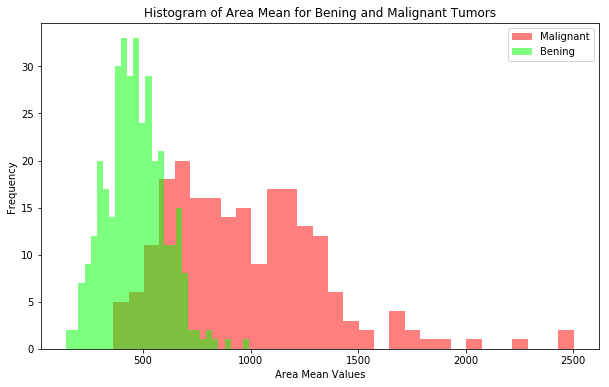

Most frequent malignant radius mean is:  646.8533333333334


In [10]:
f,ax = plt.subplots(figsize=(10,6))
m = plt.hist(df[df["diagnosis"] == "M"].area_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].area_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Area Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Area Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_area_mean = m[0].max()
index_frequent_malignant_area_mean = list(m[0]).index(frequent_malignant_area_mean)
most_frequent_malignant_area_mean = m[1][index_frequent_malignant_area_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_area_mean)

つぎに3つ以上特徴量比較をするため、ペアグリッドプロットを使用します。  'radius_worst'、'perimeter_worst'と'area_worst'はいずれもworstであるため、ペアのグリッドプロットで可視化すると、当然ながら相関していることが確認できます。

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


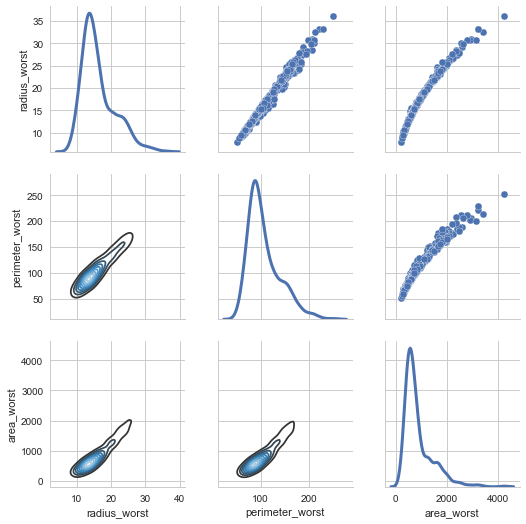

In [11]:
sns.set(style='whitegrid')
x=df.loc[:,['radius_worst','perimeter_worst','area_worst']]
g=sns.PairGrid(x,diag_sharey=False)
g.map_lower(sns.kdeplot,cmap='Blues_d')
g.map_upper(plt.scatter,edgecolor="w")
g.map_diag(sns.kdeplot,lw=3)

# 前処理の実装と説明

IDのカラムを取得

### カテゴリカルデータの数値化

診断結果のカラムを取得  
診断（M =悪性、B =良性）をmapメソッドで数値化する

In [12]:
df_y=df.diagnosis 
mapping={'M':1,'B':0}
df_y=df_y.map(mapping)
df_y=pd.DataFrame(df_y)

### 特徴量のみのデータセットを取得
モデルで学習させるためにデータセットから目的変数を取り除いた特徴量のみのデータを作成。

In [13]:
df_x=df.drop(['diagnosis'],axis=1)
df_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 標準化
特徴量の標準化をする。

In [14]:
cols=df_x.columns

In [15]:
#標準化：(df_x-df_x.mean())/np.std(df_x)
#標準化を行うコードを記述
from sklearn.preprocessing import StandardScaler

for i in cols:
    x_scaler = StandardScaler()
    x_scaler.fit(df_x[i][:,np.newaxis])
    df_x[i]=x_scaler.transform(df_x[i][:,np.newaxis])

df_x=pd.DataFrame(df_x)
df_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### データセットの分割
testデータとtrainデータに分割

In [16]:
from sklearn.model_selection import train_test_split
# test_size：デフォルトは0.25
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y,test_size=0.2, random_state=0) 


#### X_trainのshapeを確認

In [17]:
X_train.shape

(455, 30)

#### X_testのshapeを確認

In [18]:
X_test.shape

(114, 30)

# モデルの作成

## チューニング
交差検証を用いたグリッドサーチ

In [19]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]

score = 'recall'
clf = GridSearchCV(SVC(), #識別器
                   tuned_parameters, #最適化したいパラメータセット
                   scoring= '%s_weighted' % score,
                   cv=5, # 交差検証の回数
                   ) 

/Users/okunagatatsuya/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/okunagatatsuya/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
clf.fit(X_train, y_train.as_matrix().reshape(-1,))

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='recall_weighted',
       verbose=0)

In [21]:
clf.best_score_

0.9802197802197802

In [22]:
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

# Accuracy、Recall、Precision、F1-measure

In [23]:
svm = SVC(gamma=0.001, C=100, probability=True,kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred = svm.predict(X_test) 
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

## スクラッチでAccuracyを算出

In [25]:
y_pred=pd.DataFrame(y_pred)
y_test = y_test.reset_index().drop("index", axis=1)

test_pred=pd.concat([y_test, y_pred], axis=1)
test_pred=test_pred.rename(columns={"diagnosis":"test", 0:"pred"})

In [26]:
test_pred.head()

,test,pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [27]:
TP=len(test_pred[(test_pred['test'] == 1) & (test_pred['pred'] == 1)])
FN=len(test_pred[(test_pred['test'] == 1) & (test_pred['pred'] == 0)])
FP=len(test_pred[(test_pred['test'] == 0) & (test_pred['pred'] == 1)])
TN=len(test_pred[(test_pred['test'] == 0) & (test_pred['pred'] == 0)])

In [28]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9649122807017544

## sklearn ライブラリーを使ってAccuracyを算出

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9649122807017544

## スクラッチでRecall（検出率）

In [30]:
recall = TP / (TP + FN)
recall


0.9574468085106383

## sklearn ライブラリーを使って Recall算出

In [31]:
from sklearn.metrics import recall_score
recall=recall_score(y_test, y_pred)
recall

0.9574468085106383

## スクラッチでPrecision（精度）

In [32]:
precision = TP / (TP + FP)
precision 

0.9574468085106383

# sklearn ライブラリーを使ってPrecision算出

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9574468085106383

## スクラッチでF1-measure（F1値）

In [34]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.9574468085106385

## sklearn ライブラリーを使って F1算出

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred) 

0.9574468085106385

## ROC曲線　ライブラリ
http://www.randpy.tokyo/entry/roc_auc

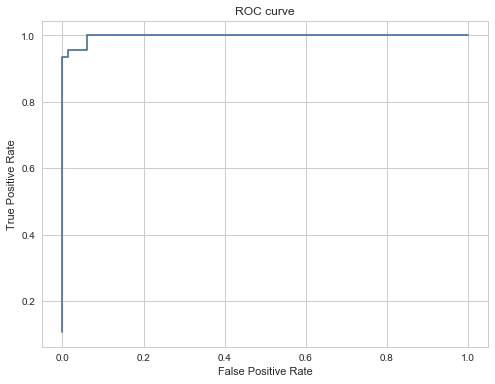

In [36]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

clf =SVC(kernel='rbf', gamma=0.001, C=100,probability=True).fit(X_train, y_train)

prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

 ## AUC　ライブラリ

In [37]:
auc = np.trapz(tpr,fpr)
print('AUC：'+str(auc))

AUC：0.9971419498253414


 ## ROC曲線　スクラッチ

In [38]:
y_test=y_test.rename(columns={'diagnosis':'test'})

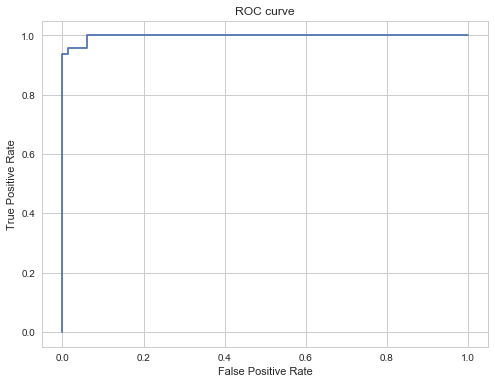

In [39]:
# スクラッチ
x=np.arange(101)/100
true_rate=[]
false_rate=[]
for i in range(101):
    y_pred=pd.DataFrame((prob>x[i]).astype(int)).rename(columns={0:"pred"})
    pred_test=pd.concat([y_pred,y_test], axis=1)
    tp = sum((pred_test["pred"]==1)&(pred_test["test"]==1))
    fn = sum((pred_test["pred"]==0)&(pred_test["test"]==1))
    fp = sum((pred_test["pred"]==1)&(pred_test["test"]==0))
    tn = sum((pred_test["pred"]==0)&(pred_test["test"]==0))
    true_rate.append(tp/(tp+fn))
    false_rate.append(fp/(fp+tn))

plt.figure(figsize=(8,6))
plt.plot(false_rate,true_rate)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## AUC スクラッチ
AUCをライブラリで計算した値と同様の値になりました。

In [40]:
true_rate1=sorted(true_rate)
false_rate1=sorted(false_rate)
h=true_rate1
w=false_rate1

area=0
for i in range(100):
    area += h[i]*(w[i+1]-w[i])
print('AUC：'+str(area))

AUC：0.9971419498253413


## クラス化